Exercise 2

In [1]:
import copy
import math

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

2.1
a)

In [27]:
cars = pd.DataFrame(data={'Car (age)': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'Price (in euros)': [6300, 5800, 5700, 4500, 4500, 4200, 4100, 3100, 2100, 2200]})
lm = LinearRegression()

X_train = copy.copy(cars)['Car (age)'].to_numpy()
X_test = copy.copy(cars)['Car (age)'].to_numpy()
y_train = copy.copy(cars)['Price (in euros)'].to_numpy()
y_test = copy.copy(cars)['Price (in euros)'].to_numpy()
lm.fit(X_train.reshape(-1, 1), y_train)
print (lm.coef_)
print (lm.intercept_)
pred = lm.predict(X_test.reshape(-1, 1))
print(pred, y_test)

[-468.48484848]
7763.636363636364
[6358.18181818 5889.6969697  5421.21212121 4952.72727273 4484.24242424
 4015.75757576 3547.27272727 3078.78787879 2610.3030303  2141.81818182] [6300 5800 5700 4500 4500 4200 4100 3100 2100 2200]


In [3]:
def calc_rse(y_hut, y):
    rss = 0
    for i in range(0, len(pred)):
        rss += (y[i] - y_hut[i]) ** 2
    return math.sqrt(rss / (len(y) - 2))

In [4]:
print(calc_rse(pred, y_test))

335.04861700591425


In [38]:
def calc_r_sqrt(y_hut, y):

    sqe = 0
    sqt = 0
    for i in range(0, len(y)):

        sqe += (y[i] - y_hut[i])**2
        sqt += (y[i] - y.mean())**2
    return  sqe / sqt

In [39]:
print(calc_r_sqrt(pred, y_train))

0.07537490134175218



    b)


In [40]:
pred = []
for i in range(0, len(X_train)):
    pred.append(7400 - (450 * X_train[i]))

print('rse: ', calc_rse(pred, y_test))
print('r^2: ', calc_r_sqrt(pred, y_test))

rse:  423.15777199526894
r^2:  0.07537490134175218


2.2

![image info](./assets/IMG_3026.jpg)

2.3
    a)
    A: For a fixed value of IQ and performance, males earn more on average than females provided that the school performance is high enough.
    ( higher than 3.5 ) in case high value for performace means high performance ;)


    b)

In [8]:
salary = 50 + (20 * 3.7) + (0.07 * 110) + (35 * 1) + (0.01 * (3.7 * 110)) + (-10 * (3.7 * 1))
print ("predicted salary:", salary)

predicted salary: 133.76999999999998


2.4

a) Visualisation of the Dataset and Calculation of Correlations

In [9]:
titanic_all = pd.concat([pd.read_csv('titanic/train.csv'), pd.read_csv('titanic/test.csv')])
titanic_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Visualise

Correlation:  -0.3384810359610148


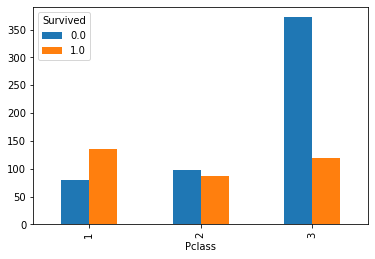

In [10]:

# Survived per Class
df = titanic_all.groupby(['Pclass','Survived']).size()
df = df.unstack()
df.plot(kind='bar')
correlation = titanic_all['Pclass'].corr(titanic_all['Survived'])
print ('Correlation: ', correlation)

Correlation:  -0.07722109457217756


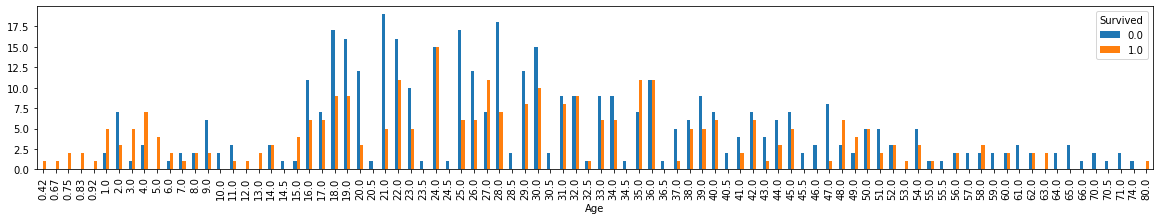

In [11]:
# Survived per Age
df = titanic_all.groupby(['Age','Survived']).size()
df = df.unstack()
df.plot(figsize=(20,3),kind='bar')
correlation = titanic_all['Age'].corr(titanic_all['Survived'])
print ('Correlation: ', correlation)

Correlation:  -0.5433513806577546


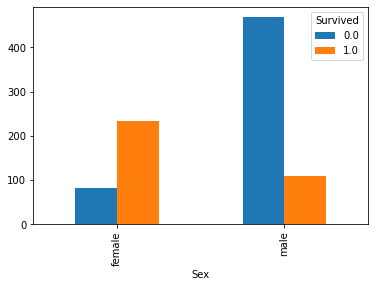

In [12]:
# Survived per Sex
df = titanic_all.groupby(['Sex','Survived']).size()
df = df.unstack()
df.plot(kind='bar')
correlation = titanic_all['Sex'].map(dict(male=1, female=0)).corr(titanic_all['Survived'])
print ('Correlation: ', correlation)

Correlation:  -0.03532249888573557


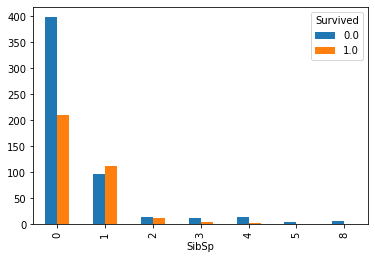

In [13]:
# Survived per SibSp
df = titanic_all.groupby(['SibSp','Survived']).size()
df = df.unstack()
df.plot(kind='bar')
correlation = titanic_all['SibSp'].corr(titanic_all['Survived'])
print ('Correlation: ', correlation)

Correlation:  0.08162940708348361


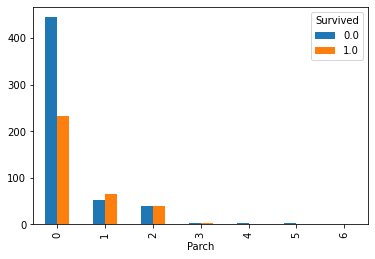

In [14]:
# Survived per Parch
df = titanic_all.groupby(['Parch','Survived']).size()
df = df.unstack()
df.plot(kind='bar')
correlation = titanic_all['Parch'].corr(titanic_all['Survived'])
print ('Correlation: ', correlation)

Correlation:  0.2573065223849622


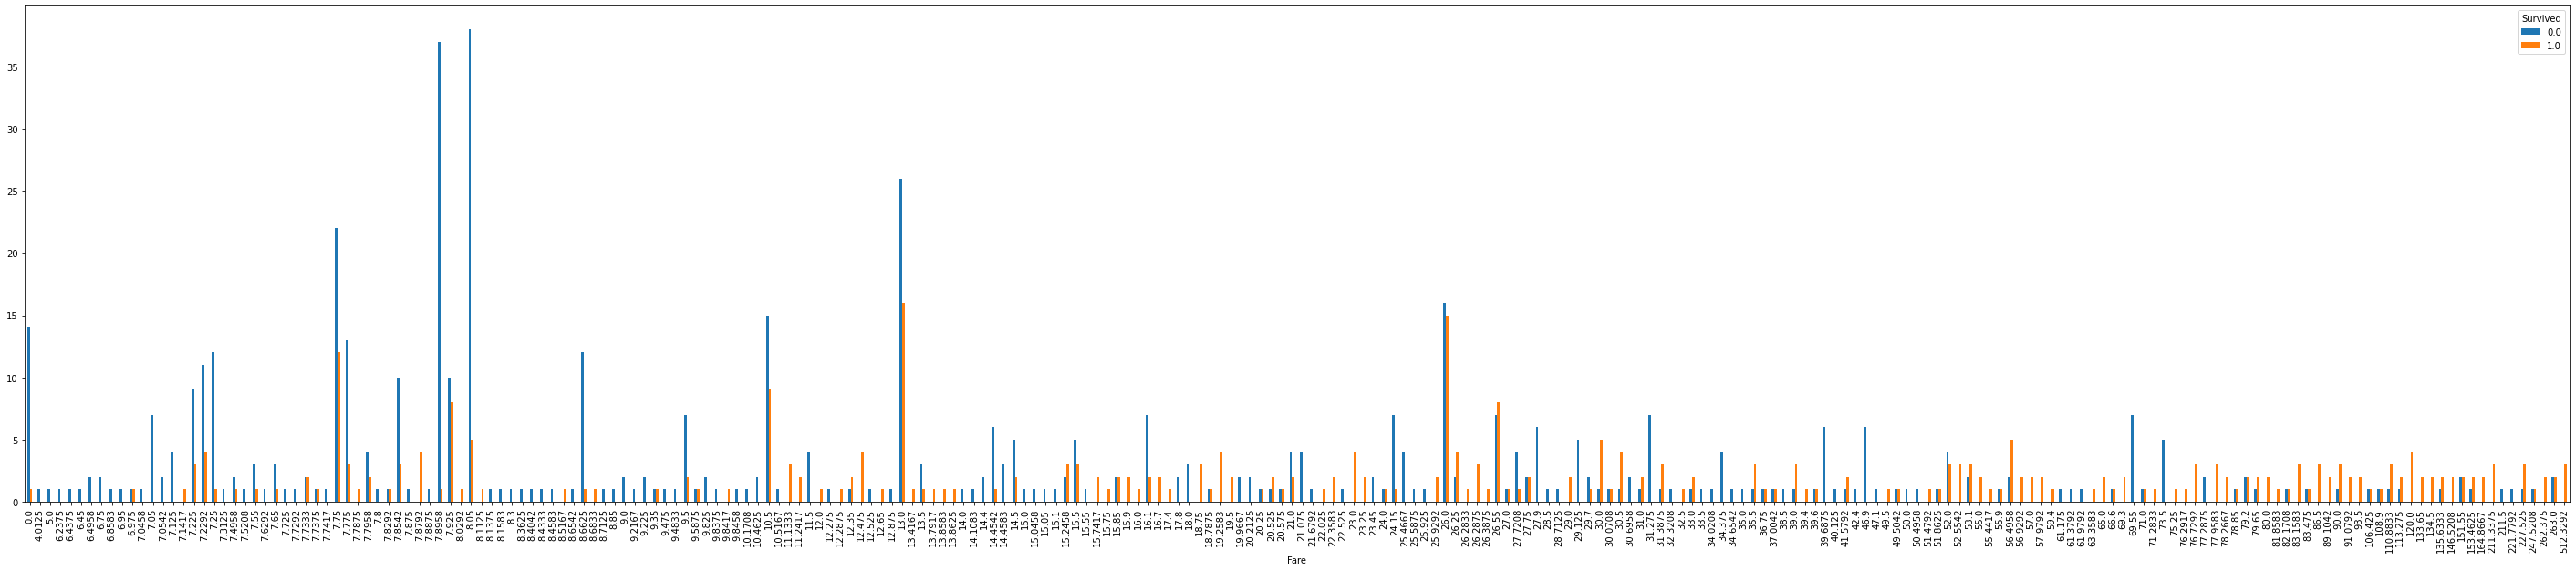

In [15]:
# Survived per Fare
df = titanic_all.groupby(['Fare','Survived']).size()
df = df.unstack()
df.plot(figsize=(50,10),kind='bar')
correlation = titanic_all['Fare'].corr(titanic_all['Survived'])
print ('Correlation: ', correlation)

Correlation:  0.08034414162193021


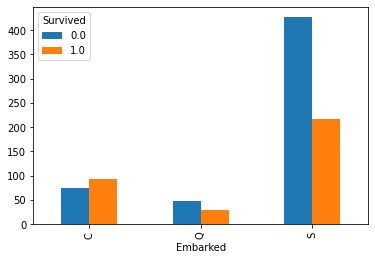

In [16]:
# Survived per Parch
df = titanic_all.groupby(['Embarked','Survived']).size()
df = df.unstack()
df.plot(kind='bar')
correlation = titanic_all['Embarked'].map(dict(S=0, C=1, Q=3)).corr(titanic_all['Survived'])
print ('Correlation: ', correlation)

b) strategies to handle missing Data

1. Deleting Rows with msising values
2. Use Algorithms with support for missing values
3. Predict missing values ;)

Visualisation of missing data in Dataset:

<AxesSubplot:>

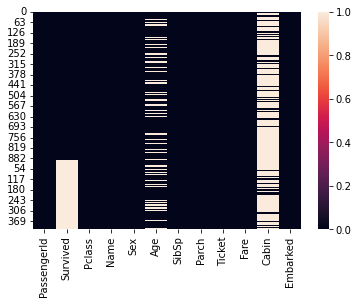

In [17]:
sns.heatmap(titanic_all.isnull())

Imute missing Data:

<AxesSubplot:>

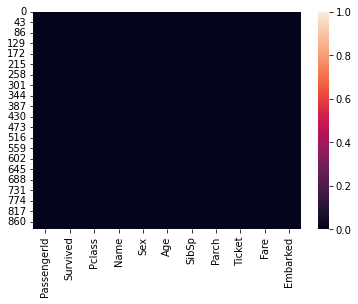

In [18]:
train = pd.read_csv('titanic/train.csv')
train.drop('Cabin', axis=1, inplace=True)
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)
sns.heatmap(train.isnull())

Drop features

In [19]:
train.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)
train['Sex'] = pd.get_dummies(train["Sex"],drop_first=True)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,25.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [20]:

#X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.1, random_state=0)

X_train = train.drop('Survived',axis=1).to_numpy()
y_train = train['Survived'].to_numpy()
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/max/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
from sklearn.metrics import classification_report

test = pd.read_csv('titanic/Titantic_Labelled_Test_Dataset.csv')
X_test = copy.copy(test)
X_test['Sex'] = pd.get_dummies(X_test["Sex"],drop_first=True)
X_test.drop(['Embarked','Name','Ticket', 'Cabin', 'Survived',],axis=1,inplace=True)
X_test['Age'].fillna(train['Age'].mean(), inplace=True)
X_test = X_test.to_numpy()
X_test = np.nan_to_num(X_test)
Y_test = test['Survived']
Y_test = Y_test.to_numpy()

In [22]:
pred = model.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       260
         1.0       0.67      0.70      0.68       158

    accuracy                           0.76       418
   macro avg       0.74      0.74      0.74       418
weighted avg       0.76      0.76      0.76       418

